<a href="https://colab.research.google.com/github/laaksonenl/machine-learning/blob/master/iowa_house_prices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# House Prices: Advanced Regression Techniques

Kaggle competition for predicting house prices based on the given features
https://www.kaggle.com/c/house-prices-advanced-regression-techniques/overview



## Evalution

The performance is measured with Root-Mean-Squared-Error (RMSE) between the logarithm of the predicted value and the logarithm of the observed sales price. (Taking logs means that errors in predicting expensive houses and cheap houses will affect the result equally.)

In [ ]:
! pip install -q kaggle
from google.colab import files

# Select your exported Kaggle API json file
files.upload()

! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/

! chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json


In [ ]:
! kaggle competitions download -c house-prices-advanced-regression-techniques

  0% 0.00/441k [00:00<?, ?B/s]
100% 441k/441k [00:00<00:00, 59.9MB/s]
  0% 0.00/450k [00:00<?, ?B/s]
100% 450k/450k [00:00<00:00, 63.1MB/s]
  0% 0.00/13.1k [00:00<?, ?B/s]
100% 13.1k/13.1k [00:00<00:00, 13.6MB/s]
  0% 0.00/31.2k [00:00<?, ?B/s]
100% 31.2k/31.2k [00:00<00:00, 31.0MB/s]


## Data analysis

In [ ]:
import pandas as pd
import numpy as np

def load_data(csv_path):
  return pd.read_csv(csv_path)

train = load_data('train.csv')
test = load_data('test.csv')


Since the test data is given to us, we assume that the training and test sets are split correctly by stratified sampling.

Stratified sampling is a sampling method where the dataset is split in some subsets where each subset share a common characteristics and both training and test sets maintain the proportions of these subsets.

For example, the dataset could consist of 25% of apartment buildings and 75% of detached houses. With stratified sampling, both training and test set also have 25%/75% split by house type so they represent the original dataset as close as possible. This way we avoid sampling bias (where for example, training set could contain only detached houses).

In [ ]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

### Data attribute descriptions

SalePrice - the property's sale price in dollars. This is the target variable that you're trying to predict.

MSSubClass: The building class

MSZoning: The general zoning classification

LotFrontage: Linear feet of street connected to property

LotArea: Lot size in square feet

Street: Type of road access

Alley: Type of alley access

LotShape: General shape of property

LandContour: Flatness of the property

Utilities: Type of utilities available

LotConfig: Lot configuration

LandSlope: Slope of property

Neighborhood: Physical locations within Ames city limits

Condition1: Proximity to main road or railroad

Condition2: Proximity to main road or railroad (if a second is present)

BldgType: Type of dwelling

HouseStyle: Style of dwelling

OverallQual: Overall material and finish quality

OverallCond: Overall condition rating

YearBuilt: Original construction date

YearRemodAdd: Remodel date

RoofStyle: Type of roof

RoofMatl: Roof material

Exterior1st: Exterior covering on house

Exterior2nd: Exterior covering on house (if more than one material)

MasVnrType: Masonry veneer type

MasVnrArea: Masonry veneer area in square feet

ExterQual: Exterior material quality

ExterCond: Present condition of the material on the exterior

Foundation: Type of foundation

BsmtQual: Height of the basement

BsmtCond: General condition of the basement

BsmtExposure: Walkout or garden level basement walls

BsmtFinType1: Quality of basement finished area

BsmtFinSF1: Type 1 finished square feet

BsmtFinType2: Quality of second finished area (if present)

BsmtFinSF2: Type 2 finished square feet

BsmtUnfSF: Unfinished square feet of basement area

TotalBsmtSF: Total square feet of basement area

Heating: Type of heating

HeatingQC: Heating quality and condition

CentralAir: Central air conditioning

Electrical: Electrical system

1stFlrSF: First Floor square feet

2ndFlrSF: Second floor square feet

LowQualFinSF: Low quality finished square feet (all floors)

GrLivArea: Above grade (ground) living area square feet

BsmtFullBath: Basement full bathrooms

BsmtHalfBath: Basement half bathrooms

FullBath: Full bathrooms above grade

HalfBath: Half baths above grade

Bedroom: Number of bedrooms above basement level

Kitchen: Number of kitchens

KitchenQual: Kitchen quality

TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)

Functional: Home functionality rating

Fireplaces: Number of fireplaces

FireplaceQu: Fireplace quality

GarageType: Garage location

GarageYrBlt: Year garage was built

GarageFinish: Interior finish of the garage

GarageCars: Size of garage in car capacity

GarageArea: Size of garage in square feet

GarageQual: Garage quality

GarageCond: Garage condition

PavedDrive: Paved driveway

WoodDeckSF: Wood deck area in square feet

OpenPorchSF: Open porch area in square feet

EnclosedPorch: Enclosed porch area in square feet

3SsnPorch: Three season porch area in square feet

ScreenPorch: Screen porch area in square feet

PoolArea: Pool area in square feet

PoolQC: Pool quality

Fence: Fence quality

MiscFeature: Miscellaneous feature not covered in other categories

MiscVal: $Value of miscellaneous feature

MoSold: Month Sold

YrSold: Year Sold

SaleType: Type of sale

SaleCondition: Condition of sale



In [ ]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [ ]:
print(train["Alley"].value_counts(), "\n")
print(train["Street"].value_counts())

Grvl    50
Pave    41
Name: Alley, dtype: int64 

Pave    1454
Grvl       6
Name: Street, dtype: int64


Both features seem to have same values, most values missing from Alley.
Consider combining Alley with Street or removing the whole feature if it has not strong colleration with SalePrice.

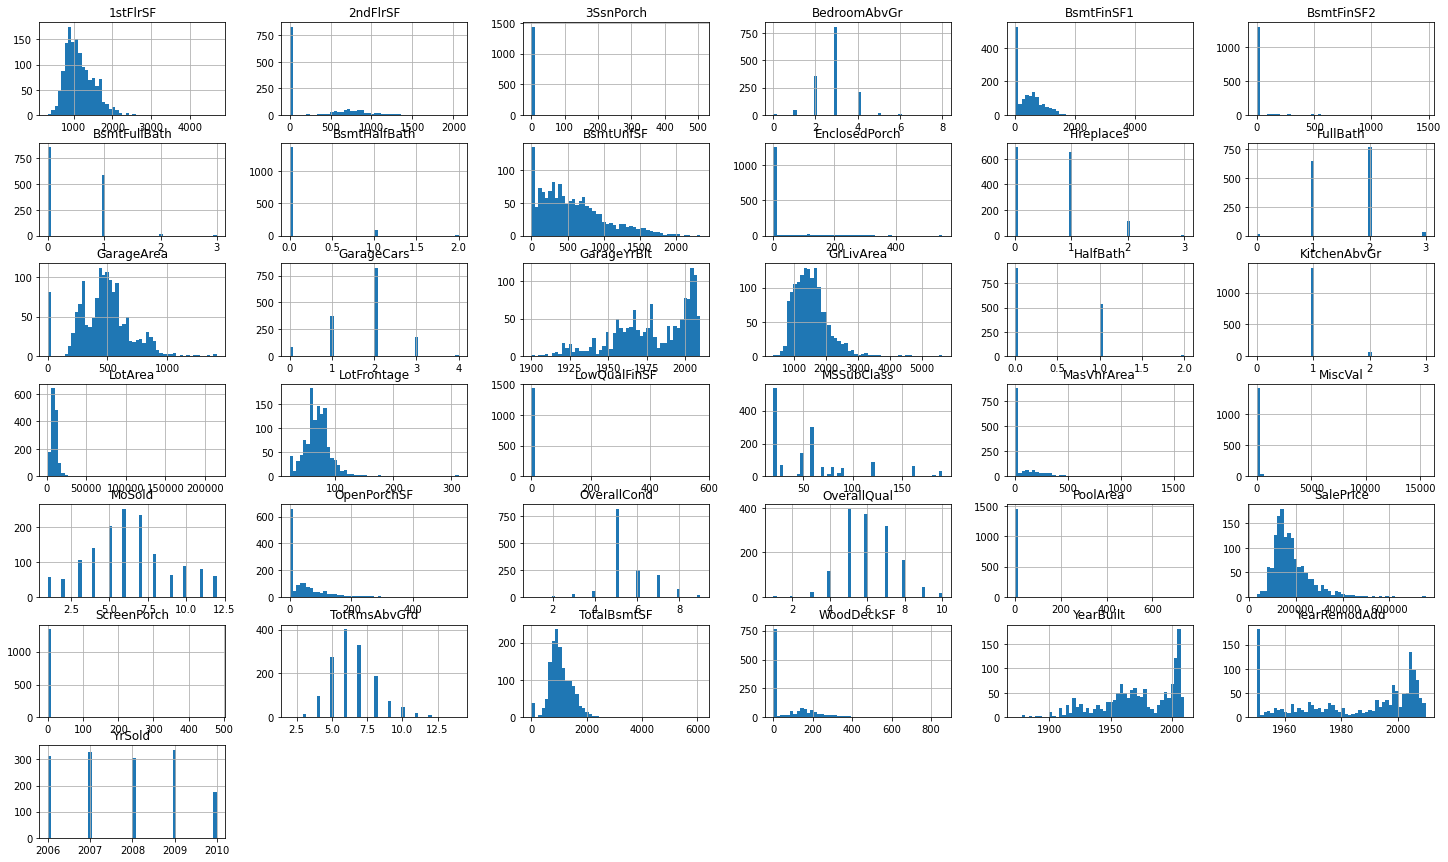

In [ ]:
import matplotlib.pyplot as plt
train.drop("Id", axis=1).hist(bins=50, figsize=(25,15))
plt.show()

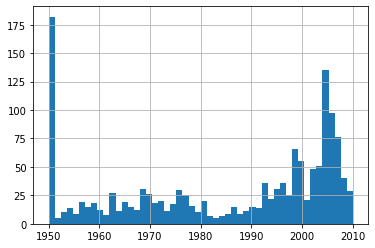

In [ ]:
train["YearRemodAdd"].hist(bins=50)

It seems remodel year is minimum capped to 1950 so all remodeled houses before 1950 are stacked to the same year.

### Correlations

In [ ]:
corr_matrix = train.corr()
correlations = corr_matrix["SalePrice"].sort_values(ascending=False)

correlations

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


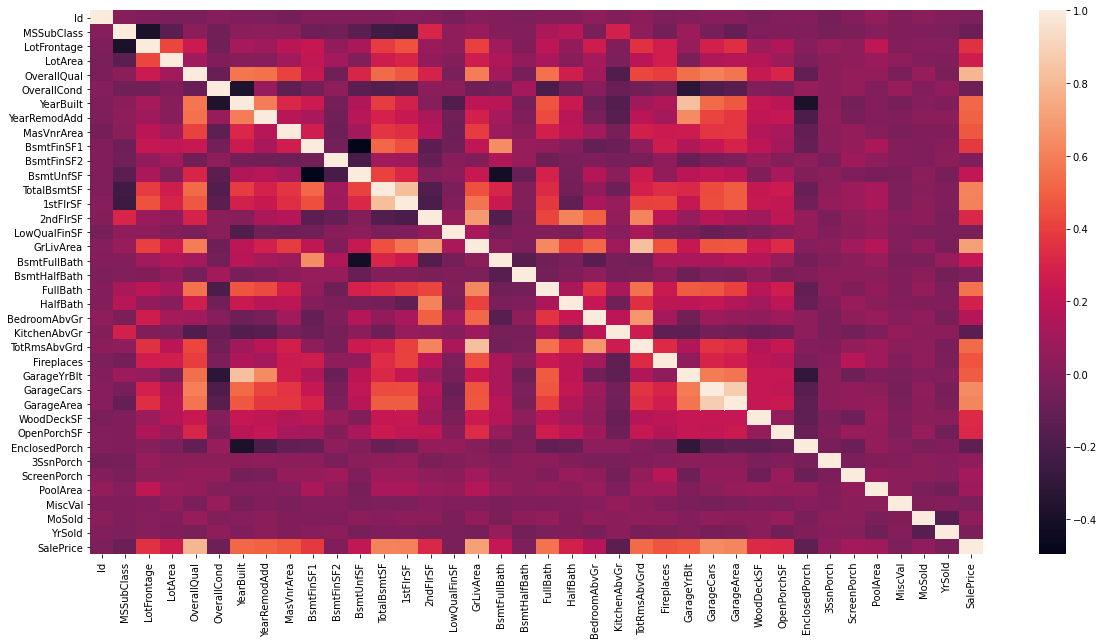

In [ ]:
import seaborn as sns

plt.figure(figsize=(20, 10))
sns.heatmap(corr_matrix)

Need to remember that standard correlation coefficients show only LINEAR correlations. These coefficients fail to capture non-linear correlations.


Let's focus on the most correlated features and check the linearity of ambiguous features by plotting them.

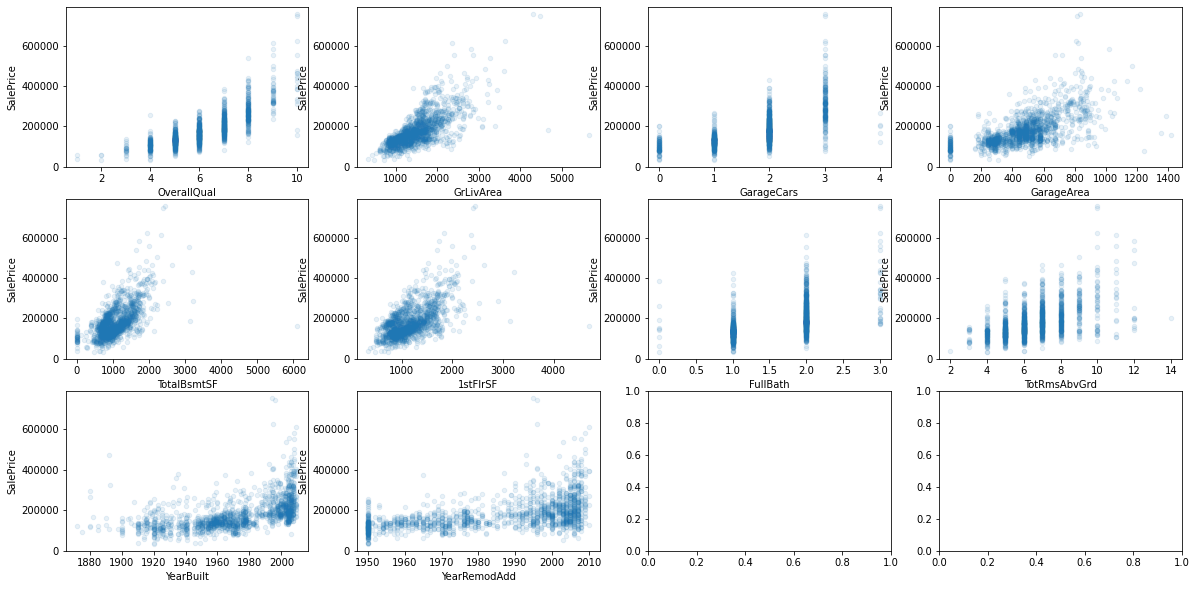

In [ ]:
from pandas.plotting import scatter_matrix

most_correlated_attrs = correlations[1:11].index.to_numpy()

def plot_scatters(data, attrs):
  columns = 4
  rows = int(attrs.size / columns) + 1
  fig, axes = plt.subplots(nrows=rows, ncols=columns, figsize=(20,10))

  for idx, attr in enumerate(attrs):
    data.plot(kind="scatter", ax=np.ravel(axes)[idx], x=attr, y="SalePrice", alpha=0.1)

plot_scatters(train, most_correlated_attrs)

Upward trend can be seen in all of them

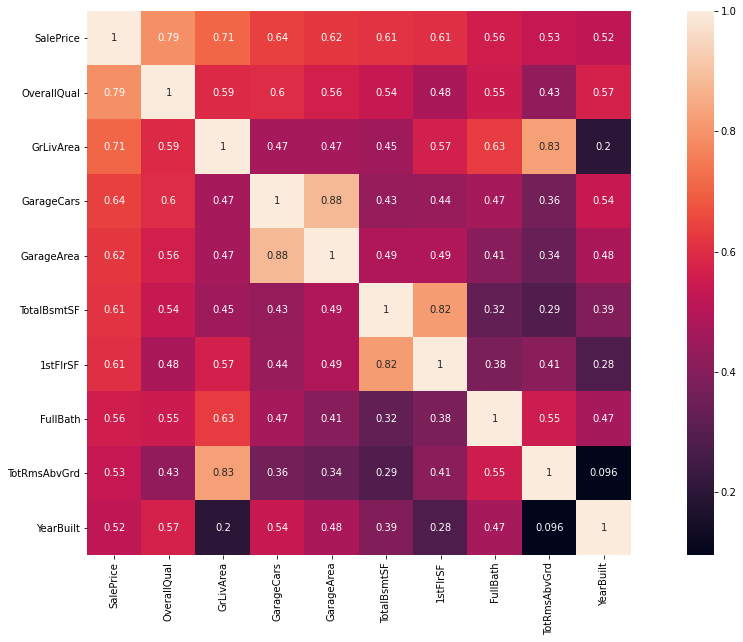

In [ ]:
cols = corr_matrix.nlargest(10, "SalePrice")["SalePrice"].index

coeffs = train[cols].corr()
plt.figure(figsize=(20, 10))
sns.heatmap(coeffs, annot=True, square=True)

['PoolArea' 'MoSold' '3SsnPorch' 'BsmtFinSF2' 'BsmtHalfBath' 'MiscVal'
 'Id' 'LowQualFinSF' 'YrSold' 'OverallCond' 'MSSubClass' 'EnclosedPorch'
 'KitchenAbvGr']


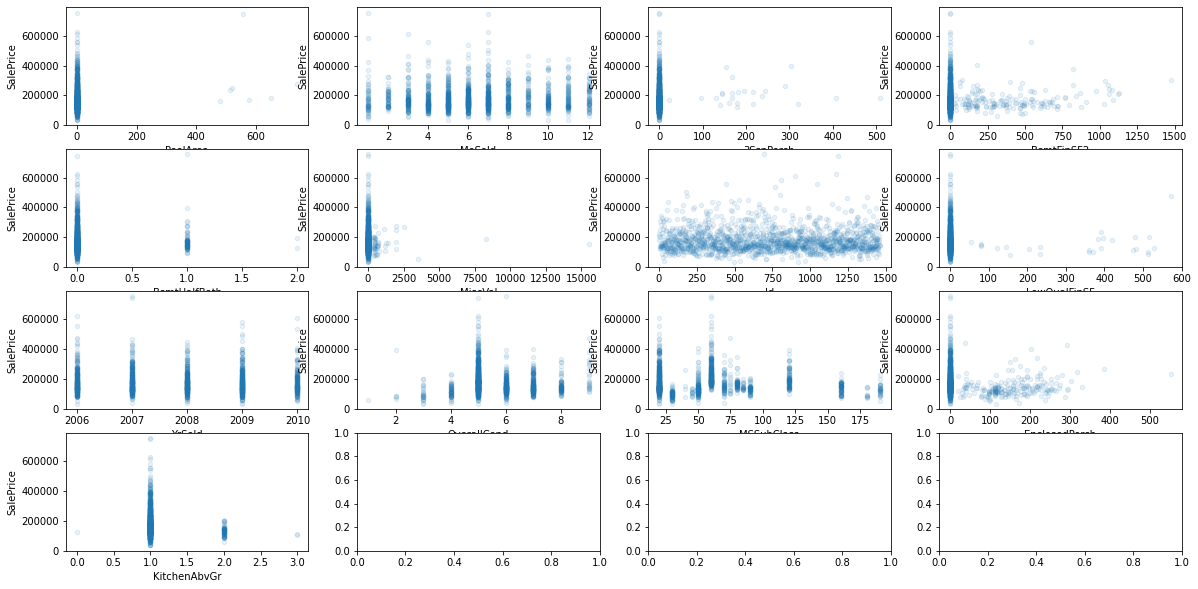

In [ ]:
non_correlated_attrs = correlations[correlations < 0.1].index.to_numpy()
print(non_correlated_attrs)
plot_scatters(train, non_correlated_attrs)

No clear trend can be seen in the uncorrelated (by standard correlation) features

In [ ]:
cols = train.columns
num_cols = train._get_numeric_data().columns
list(set(cols) - set(num_cols))

['Alley',
 'SaleType',
 'CentralAir',
 'GarageCond',
 'GarageQual',
 'Heating',
 'PoolQC',
 'BsmtFinType1',
 'Condition1',
 'FireplaceQu',
 'Exterior2nd',
 'MSZoning',
 'LandSlope',
 'Functional',
 'Foundation',
 'Electrical',
 'HouseStyle',
 'MiscFeature',
 'ExterCond',
 'Exterior1st',
 'ExterQual',
 'Condition2',
 'SaleCondition',
 'Street',
 'BsmtFinType2',
 'Neighborhood',
 'BldgType',
 'Utilities',
 'RoofMatl',
 'RoofStyle',
 'BsmtCond',
 'LotShape',
 'GarageType',
 'Fence',
 'PavedDrive',
 'LotConfig',
 'MasVnrType',
 'BsmtQual',
 'BsmtExposure',
 'GarageFinish',
 'LandContour',
 'KitchenQual',
 'HeatingQC']

In [67]:
train.groupby("YearBuilt")         \
     .size()                       \
     .where(lambda x: x > 10)      \
     .dropna()                     \
     .sort_values(ascending=False) \

YearBuilt
2006    67.0
2005    64.0
2004    54.0
2007    49.0
2003    45.0
1976    33.0
1977    32.0
1920    30.0
1959    26.0
1998    25.0
1999    25.0
2000    24.0
1954    24.0
1965    24.0
1958    24.0
1970    24.0
2008    23.0
1972    23.0
2002    23.0
1971    22.0
1968    22.0
1950    20.0
1957    20.0
2001    20.0
1962    19.0
1994    19.0
1940    18.0
1966    18.0
2009    18.0
1995    18.0
1910    17.0
1960    17.0
1993    17.0
1925    16.0
1955    16.0
1967    16.0
1978    16.0
1963    16.0
1964    15.0
1941    15.0
1996    15.0
1961    14.0
1969    14.0
1948    14.0
1997    14.0
1956    14.0
1992    13.0
1990    12.0
1953    12.0
1949    12.0
1988    11.0
1973    11.0
dtype: float64

decade
(1870, 1880]    59.5
(1880, 1890]    60.0
(1890, 1900]    66.5
(1900, 1910]    60.0
(1910, 1920]    60.0
(1920, 1930]    55.0
(1930, 1940]    60.0
(1940, 1950]    60.0
(1950, 1960]    73.0
(1960, 1970]    74.0
(1970, 1980]    70.0
(1980, 1990]    78.0
(1990, 2000]    70.0
(2000, 2010]    72.0
(2010, 2020]     NaN
Name: LotFrontage, dtype: float64

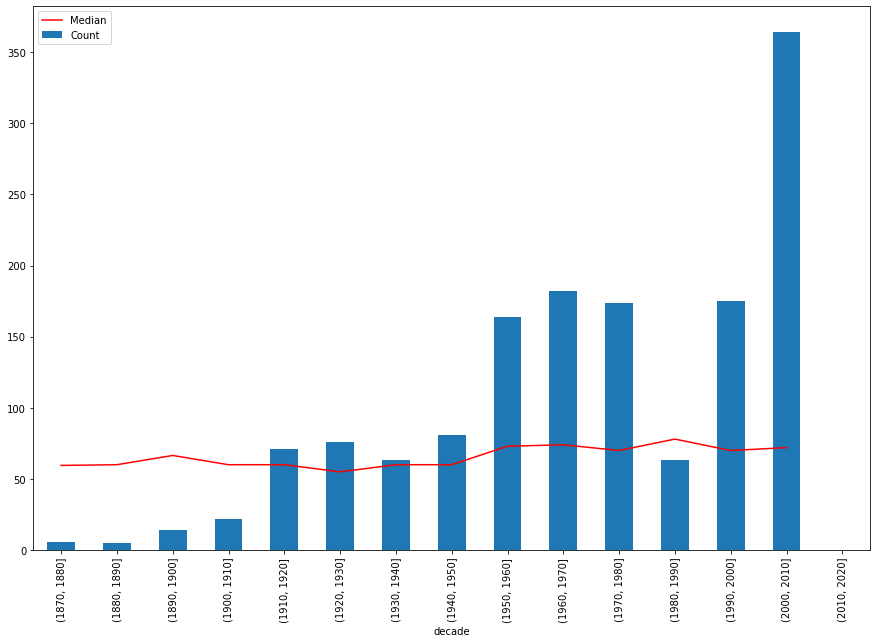

In [68]:
years = train[["YearBuilt", "LotFrontage"]].copy()

start_year = train["YearBuilt"].min() - train["YearBuilt"].min() % 10 # Round down to start of the decade
end_year = train["YearBuilt"].max() + (10 - train["YearBuilt"].max() % 10)
periods = (end_year - start_year) / 10

plt.figure(figsize=(15,10))
plt.xticks(rotation=90)

bins = pd.interval_range(start=start_year, end=end_year, periods=periods)
years["decade"] = pd.cut(years["YearBuilt"], bins=bins)
years["decade"].value_counts(sort=False).plot(kind="bar", rot=90)

ax = years.groupby("decade")["LotFrontage"].median().plot(c="red", rot=90)
ax.legend(["Median", "Count"])

years.groupby("decade")["LotFrontage"].median()

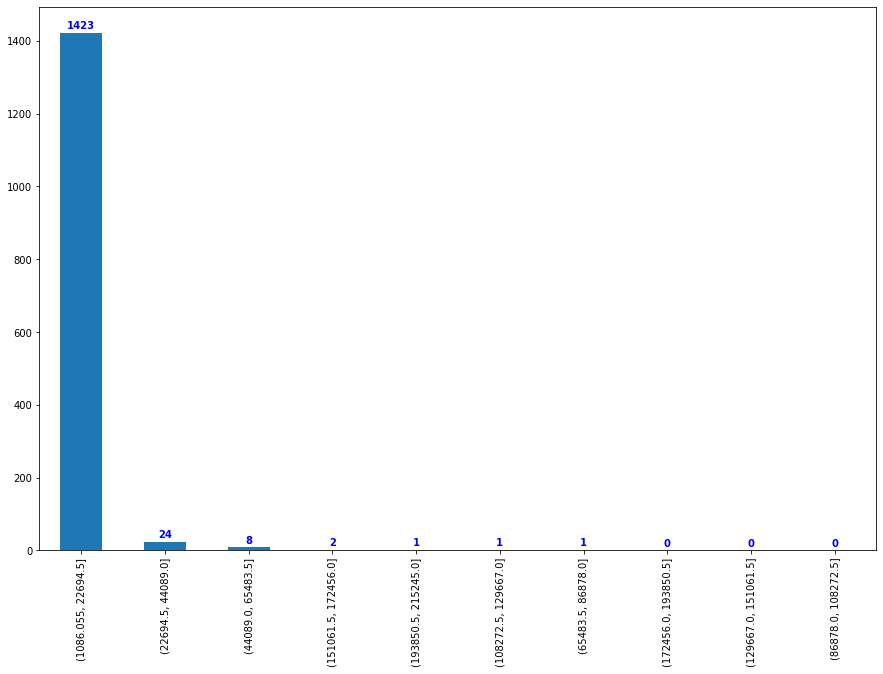

In [69]:
lot_area_groups = train[["LotArea", "LotFrontage"]].copy()
lot_area_groups["lot_bin"] = pd.cut(lot_area_groups["LotArea"], bins=10)

ax = lot_area_groups["lot_bin"].value_counts().plot(kind="bar", figsize=(15,10))
for i, p in enumerate(ax.patches):
  h = p.get_height()
  ax.text(i, h + 20, str(h), color='blue', fontweight='bold', ha='center', va='center')

count    1460.000000
mean     1162.626712
std       386.587738
min       334.000000
25%       882.000000
50%      1087.000000
75%      1391.250000
max      4692.000000
Name: 1stFlrSF, dtype: float64


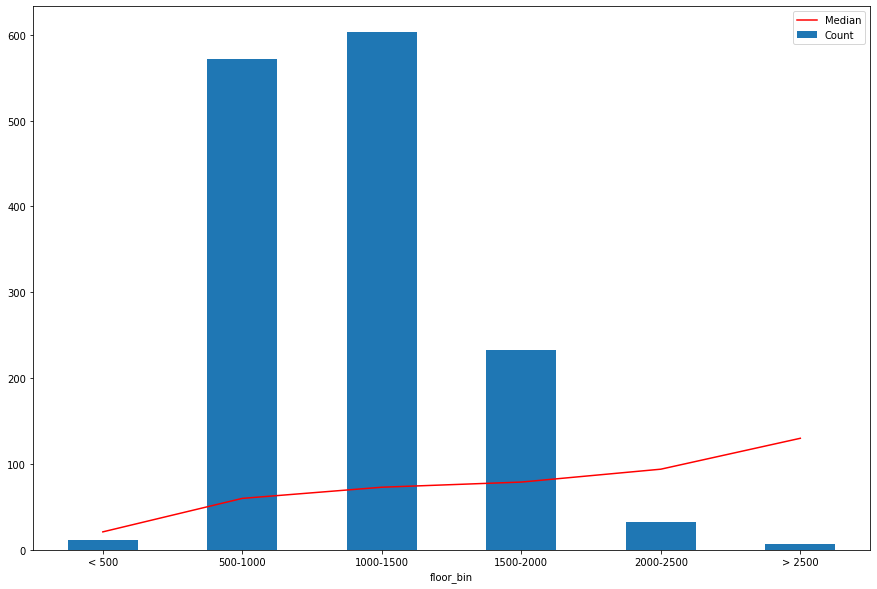

In [70]:
print(train["1stFlrSF"].describe())

plt.figure(figsize=(15,10))
plt.xticks(rotation=90)

df_floor_frontage = train[["LotFrontage", "1stFlrSF"]].copy()


df_floor_frontage["floor_bin"] = pd.cut(df_floor_frontage["1stFlrSF"],
             bins=[0, 500, 1000, 1500, 2000, 2500, np.Inf],
             labels=["< 500", "500-1000", "1000-1500", "1500-2000", "2000-2500", "> 2500"])

df_floor_frontage["floor_bin"].value_counts(sort=False).plot(kind="bar")
ax = df_floor_frontage.groupby("floor_bin")["LotFrontage"].median().plot(c="red")
ax.legend(["Median", "Count"])

It seems that the larger the 1st floor area is, the larger the lot frontage. It makes sense that bigger houses (area-wise) require bigger lot too which likely affects lot frontage too.

### SalePrice (target label)


count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

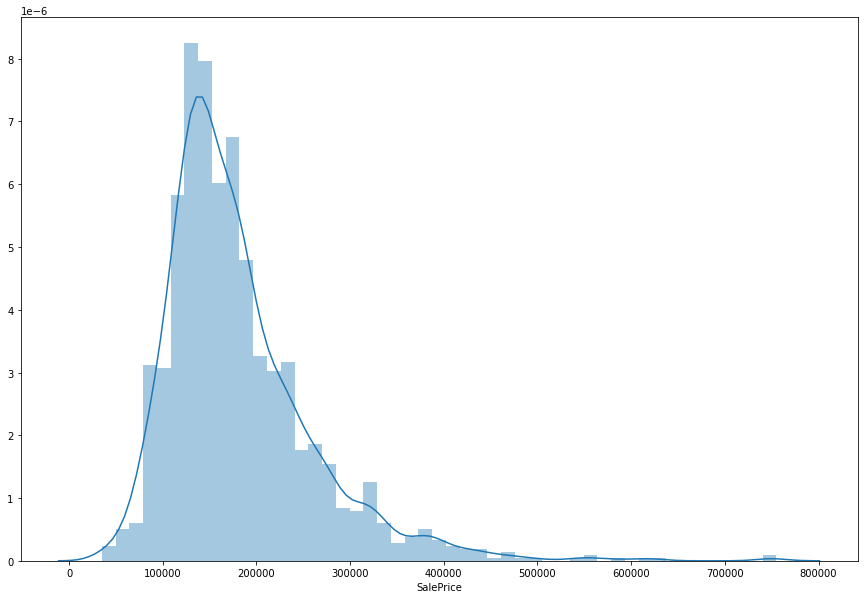

In [ ]:

plt.figure(figsize=(15,10))
sns.distplot(train["SalePrice"])
train["SalePrice"].describe()

Seems to be skewed to right, it could be wrangled to be more normally distributed. Linear models tend to work well with normally distributed data.

## Data cleaning

### Missing data

In [ ]:
missing = train.isnull().sum().sort_values(ascending=False)
total_rows = train.shape[0]
print("Total rows", total_rows)
pct = missing / total_rows * 100

corr_to_price = correlations[missing.index.to_numpy()].dropna()
df_missing = pd.concat([missing, pct, corr_to_price], axis=1, keys=["Count", "%", "Correlation to price"])
df_missing = df_missing[df_missing["Count"] > 0]

df_missing

Total rows 1460


,Count,%,Correlation to price
PoolQC,1453,99.520548,NaN
MiscFeature,1406,96.301370,NaN
Alley,1369,93.767123,NaN
Fence,1179,80.753425,NaN
FireplaceQu,690,47.260274,NaN
LotFrontage,259,17.739726,0.351799
GarageCond,81,5.547945,NaN
GarageType,81,5.547945,NaN
GarageYrBlt,81,5.547945,0.486362
GarageFinish,81,5.547945,NaN


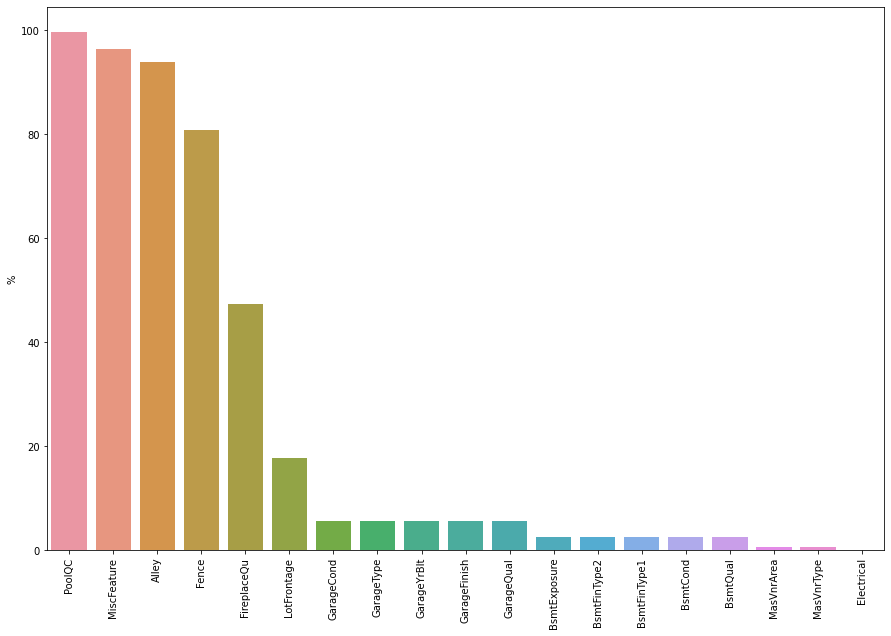

In [ ]:
plt.figure(figsize=(15,10))
plt.xticks(rotation=90)
sns.barplot(x=df_missing.index, y=df_missing["%"])

Top 5 features are missing most of the data.
With top 5 features, let's fill the missing values with 'None'. Pools and miscellaneous features are rare so it makes sense that there's no value at all for the observations and can be considered as corresponding "none".



In [ ]:
imputed_data = train.copy()

def fill_with_none(data):
  attrs = ["PoolQC", "MiscFeature", "Alley", "Fence", "FireplaceQu"]
  df = data[attrs].fillna("None")
  data.update(df)

  return data

imputed_data = fill_with_none(imputed_data)

### Encode categorical values

In [66]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

related_categories = ["LotFrontage",
                      "Neighborhood",
                      "HouseStyle",
                      "YearBuilt",
                      "LandSlope",
                      "GarageType"]

df_labeled = train[related_categories].dropna().apply(encoder.fit_transform)

def replaceColumn(data, new_data):
  def replace(column):
    data[column] = new_data
    return data
  return replace

df = train.copy()

df_labeled = replaceColumn(df, df_labeled)(related_categories)
df_labeled.corr()["LotFrontage"].sort_values(ascending=False)


LotFrontage      1.000000
1stFlrSF         0.420391
LotArea          0.382342
SalePrice        0.378221
GrLivArea        0.374467
GarageArea       0.368242
TotalBsmtSF      0.359770
TotRmsAbvGrd     0.356943
GarageCars       0.320084
BedroomAbvGr     0.293923
Fireplaces       0.254219
OverallQual      0.248771
MasVnrArea       0.208248
FullBath         0.199513
BsmtFinSF1       0.183006
OpenPorchSF      0.159330
BsmtUnfSF        0.145258
YearBuilt        0.126207
PoolArea         0.121390
Neighborhood     0.104462
WoodDeckSF       0.096601
BsmtFullBath     0.091860
GarageYrBlt      0.081540
3SsnPorch        0.080813
YearRemodAdd     0.080084
2ndFlrSF         0.076282
HouseStyle       0.066836
BsmtFinSF2       0.057933
HalfBath         0.057545
LandSlope        0.054764
ScreenPorch      0.046935
MoSold           0.021485
YrSold           0.012389
MiscVal          0.004071
BsmtHalfBath     0.000479
EnclosedPorch    0.000286
LowQualFinSF    -0.000155
KitchenAbvGr    -0.000155
Id          